In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline


In [2]:
#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Train Test Split


In [3]:
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### Explore Dataset

In [23]:
df = pd.read_csv("E:\\cvs's\\HumanActivityRecognition.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.29,-0.02,-0.13,-1.00,-0.98,-0.91,-1.00,-0.98,-0.92,-0.93,-0.57,-0.74,0.85,0.69,0.81,-0.97,-1.00,-1.00,-0.99,-0.99,-0.99,-0.94,-0.41,-0.68,-0.60,0.93,-0.85,0.36,-0.06,0.26,-0.22,0.26,-0.10,0.28,-0.47,0.49,-0.19,0.38,0.44,0.66,0.96,-0.14,0.12,-0.99,-0.98,-0.88,-0.99,-0.98,-0.89,0.89,...,-0.44,-0.80,-0.99,-0.99,-0.99,-0.99,-0.99,-0.99,-1.00,-0.99,-1.00,-0.94,0.35,-0.52,-0.80,-0.98,-0.96,-0.97,-0.95,-0.99,-0.98,-1.00,-0.99,-0.70,-1.00,-0.13,0.59,0.37,-0.99,-0.99,-0.99,-0.99,-0.99,-0.99,-1.00,-0.99,-0.87,-1.00,-0.07,-0.30,-0.71,-0.11,0.03,-0.46,-0.02,-0.84,0.18,-0.06,1,STANDING
1,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,-1.00,-0.97,-0.96,-0.94,-0.56,-0.82,0.85,0.69,0.82,-0.98,-1.00,-1.00,-1.00,-1.00,-0.98,-0.95,-0.71,-0.50,-0.57,0.61,-0.33,0.28,0.28,0.12,-0.09,0.29,-0.28,0.09,-0.02,-0.02,-0.22,-0.01,-0.07,0.58,0.97,-0.14,0.11,-1.00,-0.99,-0.93,-1.00,-0.99,-0.93,0.89,...,-0.12,-0.45,-0.99,-0.99,-0.99,-0.99,-0.99,-0.99,-1.00,-0.99,-1.00,-0.84,0.53,-0.62,-0.90,-0.99,-0.98,-0.98,-0.99,-0.99,-0.99,-1.00,-0.99,-0.72,-0.95,-0.27,-0.34,-0.72,-1.00,-1.00,-1.00,-1.00,-0.99,-1.00,-1.00,-0.99,-1.00,-1.00,0.16,-0.60,-0.86,0.05,-0.01,-0.73,0.70,-0.84,0.18,-0.05,1,STANDING
2,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.96,-0.98,-0.94,-0.56,-0.82,0.84,0.68,0.84,-0.98,-1.00,-1.00,-1.00,-1.00,-0.96,-0.97,-0.59,-0.49,-0.57,0.27,-0.09,0.34,-0.16,0.02,-0.07,0.34,-0.33,0.24,-0.14,0.17,-0.30,-0.12,-0.18,0.61,0.97,-0.14,0.10,-1.00,-0.99,-0.99,-1.00,-0.99,-0.99,0.89,...,-0.62,-0.88,-0.99,-0.99,-0.99,-0.99,-1.00,-0.99,-1.00,-0.99,-1.00,-0.90,0.66,-0.72,-0.93,-0.99,-0.99,-0.98,-0.99,-1.00,-0.99,-1.00,-0.99,-0.74,-0.79,-0.21,-0.

In [6]:
df.describe(include="all")

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,...,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352.00,7352
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

<AxesSubplot:xlabel='Activity', ylabel='count'>

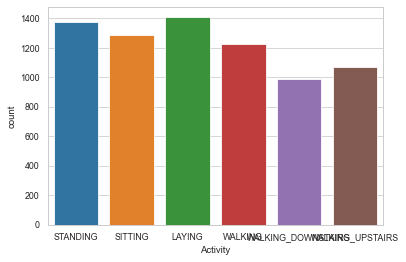

In [9]:
sns.countplot(data = df, x = "Activity")

### Pre-processing

In [10]:
#Separate the Features and the Target Variable
x = df.drop(["Activity"], axis=1)
y = df["Activity"]

In [11]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [12]:
#NOTE: Only scale the predictor variables, NOT the target variabl

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

### Training the Model

In [13]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train_scaled,y_train)


GaussianNB()

### Validate the Model

In [14]:
#Predict on the Test Set
y_pred = gnb.predict(x_test_scaled)

y_pred


array(['STANDING', 'WALKING', 'STANDING', ..., 'SITTING',
       'WALKING_DOWNSTAIRS', 'SITTING'], dtype='<U18')

In [15]:
#Check performance metrics
print("Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred)))

Accuracy: 65.34%


In [16]:
print(classification_report(y_test,y_pred))


                    precision    recall  f1-score   support

            LAYING       0.96      0.28      0.44       350
           SITTING       0.39      0.90      0.54       319
          STANDING       0.85      0.39      0.54       358
           WALKING       0.96      0.77      0.85       279
WALKING_DOWNSTAIRS       0.86      0.81      0.83       264
  WALKING_UPSTAIRS       0.70      0.92      0.79       268

          accuracy                           0.65      1838
         macro avg       0.79      0.68      0.67      1838
      weighted avg       0.79      0.65      0.65      1838



In [17]:
print (confusion_matrix(y_test, y_pred))


[[ 99 248   0   0   0   3]
 [  3 288  25   0   0   3]
 [  1 210 141   0   0   6]
 [  0   0   0 214  16  49]
 [  0   0   0   7 213  44]
 [  0   0   0   3  19 246]]


In [18]:
#Get probabilities
y_prob_df = pd.DataFrame(gnb.predict_proba(x_test_scaled), index=x_test.index, columns=gnb.classes_)

In [19]:
gnb.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype='<U18')

In [20]:
y_prob_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
6312,0.00,0.01,0.99,0.00,0.00,0.00
1562,0.00,0.00,0.00,1.00,0.00,0.00
4378,0.00,0.00,1.00,0.00,0.00,0.00
6034,0.00,0.00,0.00,0.00,0.00,1.00
6160,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
2727,0.00,0.00,1.00,0.00,0.00,0.00
2649,0.00,0.00,0.00,1.00,0.00,0.00
3447,0.00,1.00,0.00,0.00,0.00,0.00
4337,0.00,0.00,0.00,0.00,1.00,0.00


In [21]:
#View original test dataset with results for easier analysis
df_results = x_test.copy()
df_results['Class'] = y_test
df_results['Predicted'] = y_pred
new_df = df_results.join(y_prob_df)

new_df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Class,Predicted,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
6312,0.28,-0.01,-0.09,-0.99,-0.95,-0.93,-0.99,-0.95,-0.94,-0.93,-0.52,-0.74,0.85,0.68,0.84,-0.97,-1.00,-1.00,-1.00,-1.00,-0.96,-0.95,-0.48,-0.23,-0.09,0.38,-0.24,0.29,-0.16,-0.06,-0.03,0.24,-0.05,-0.10,0.06,-0.06,-0.07,0.46,0.26,0.75,0.96,-0.22,-0.05,-0.99,-0.97,-0.95,-0.99,-0.97,-0.95,0.89,...,-0.98,-1.00,-0.98,-0.94,-1.00,0.11,-0.32,-0.69,-0.97,-0.95,-0.96,-0.94,-0.99,-0.97,-1.00,-0.97,-0.57,-1.00,-0.36,0.35,0.08,-0.99,-0.99,-0.99,-0.99,-0.99,-0.99,-1.00,-0.99,-0.85,-1.00,-0.07,-0.39,-0.74,0.01,0.32,-0.54,-0.03,-0.80,0.23,0.06,28,SITTING,STANDING,0.00,0.01,0.99,0.00,0.00,0.00
1562,0.20,-0.07,-0.14,-0.42,-0.01,-0.05,-0.46,-0.05,-0.03,-0.06,-0.21,-0.30,0.44,-0.08,0.21,-0.17,-0.83,-0.81,-0.59,-0.51,-0.31,-0.02,0.21,0.26,0.27,-0.46,0.47,-0.43,0.30,-0.25,0.22,0.10,-0.04,-0.29,0.29,-0.14,-0.04,-0.33,-0.02,0.70,0.97,-0.15,0.00,-0.97,-0.86,-0.88,-0.97,-0.86,-0.88,0.91,...,-0.15,-0.64,-0.42,0.35,-0.90,-0.15,-0.12,-0.54,-0.23,-0.38,-0.29,-0.44,-0.71,-0.23,-0.71,-0.29,0.69,-0.79,0.15,-0.45,-0.75,-0.26,-0.20,-0.15,-0.36,-0.38,-0.26,-0.68,-0.31,0.63,-0.87,-0.04,-0.20,-0.65,0.24,0.56,-0.93,0.50,-0.87,0.19,0.02,7,WALKING,WALKING,0.00,0.00,0.00,1.00,0.00,0.00
4378,0.28,-0.01,-0.10,-1.00,-0.93,-0.98,-1.00,-0.93,-0.98,-0.94,-0.50,-0.80,0.85,0.68,0.84,-0.97,-1.00,-1.00,-1.00,-0.99,-0.95,-0.99,-0.63,-0.10,-0.28,0.37,-0.27,0.13,0.30,0.20,-0.32,0.41,0.12,-0.10,0.08,-0.04,-0.02,0.14,-0.38,0.18,0.96,-0.19,0.08,-1.00,-0.97,-0.97,-1.00,-0.97,-0.97,0.89,...,-0.97,-1.00,-0.97,-0.90,-0.97,0.08,-0.39,-0.73,-0.94,-0.92,-0.91,-0.94,-1.00,-0.94,-1.00,-0.97,-0.35,-1.00,-0.53,-0.46,-0.82,-0.98,-0.97,-0.97,-0.98,-0.99,-0.98,-1.00,-0.98,-0.70,-0.97,-0.40,-0.06,-0.52,0.07,0.15,-0.64,0.60,-0.82,0.21,-0.03,22,STANDING,STANDING,0.0